In [1]:
#%matplotlib qt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from ggplot import *
import datetime

In [3]:
turnstile_weather = pd.read_csv('./improved-dataset/turnstile_weather_v2.csv')

In [26]:
turnstile_weather['DAYn'] = turnstile_weather.datetime.map(lambda x: pd.to_datetime(x).day)

# Some plots to see relationships between variables and ENTRIESn_hourly

## 1 Hour

### 1.1 Hour - General

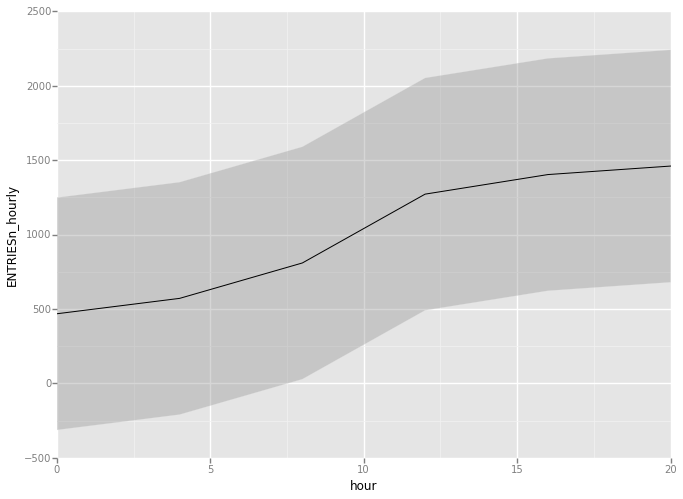

<ggplot: (345756653)>

In [85]:
column = 'hour'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + stat_smooth()

### 1.2 Hour - Weekday

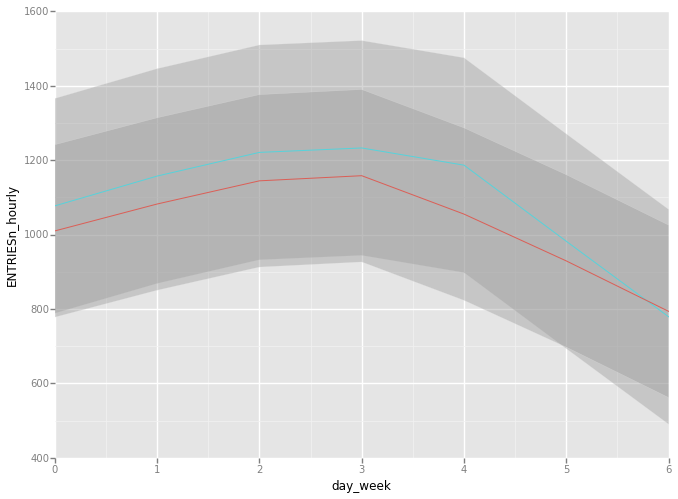

<ggplot: (421261025)>

In [267]:
column = 'day_week'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly', color='rain')) + stat_smooth()

### 1.3 Hour - Day of week

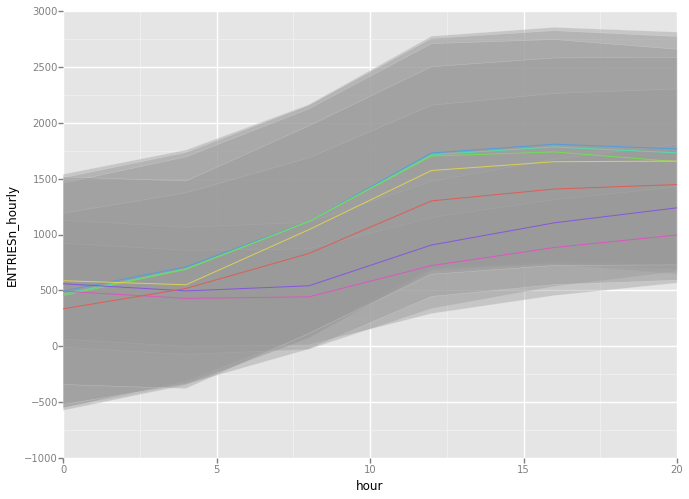

<ggplot: (283270085)>

In [71]:
column = 'hour'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly', color='day_week')) + stat_smooth()

### 1.4 Hour - Station

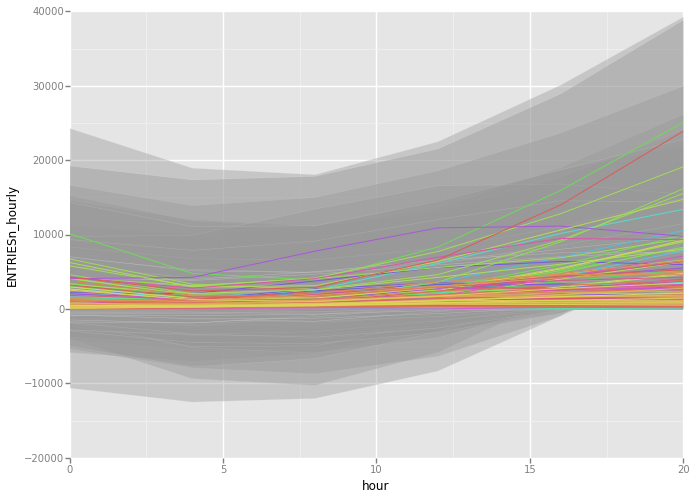

<ggplot: (288790509)>

In [55]:
column = 'hour'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly', color='station')) + stat_smooth()

## 2 Day week

### 2.1 Day week - General

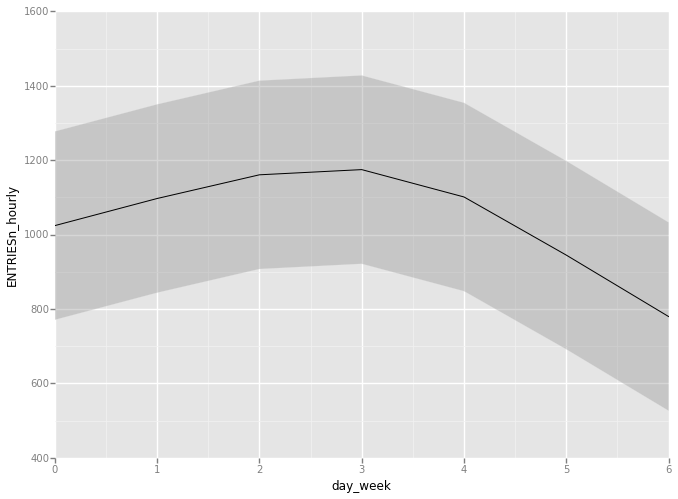

<ggplot: (281420049)>

In [111]:
column = 'day_week'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + stat_smooth()

### 2.2 Day week - Station

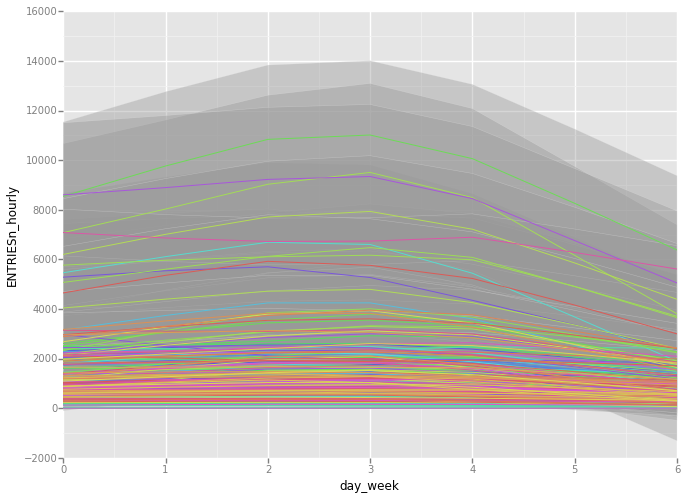

<ggplot: (286395445)>

In [56]:
column = 'day_week'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly', color='station')) + stat_smooth()

## 3 Day of month
We have to be very careful about using this data because we only have values for one month, so an estimation based on the day of the month would be very unaccurate (we don't know if the same pattern occurs other months).

### 3.1 Day of month - General

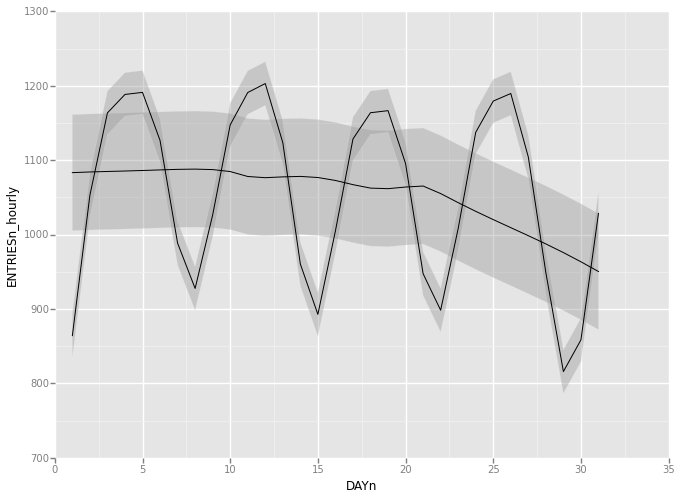

<ggplot: (281634429)>

In [118]:
column = 'DAYn'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + stat_smooth() + stat_smooth(span=0.1)

### 3.2 Day of month - General: LM vs LOESS

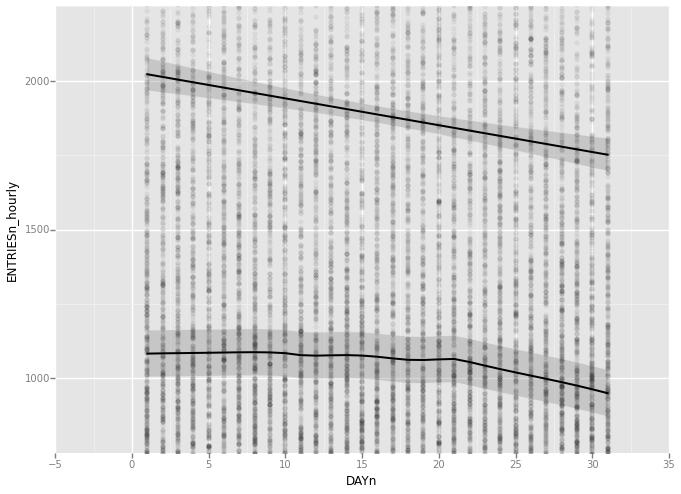

<ggplot: (319342101)>

In [123]:
column = 'DAYn'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) +\
    stat_smooth(method='lm',size=2) + \
    stat_smooth(size=2) + \
    geom_point(alpha=0.05) +\
    ylim(750, 2250)

Maybe the relationship is linear, but I think we **should avoid outliers** in computing the regression model becasue **there is a really big difference** between both methods.

### 3.3 Day of month - Rain

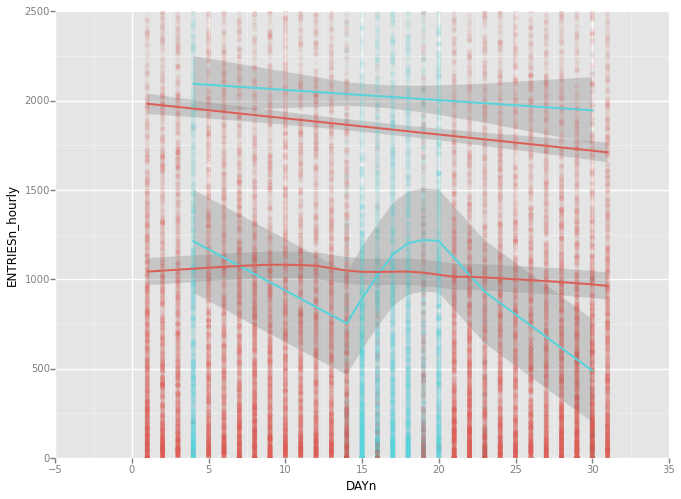

<ggplot: (285074017)>

In [127]:
column = 'DAYn'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly', color='rain')) +\
    stat_smooth(method='lm',size=2) + \
    stat_smooth(size=2) + \
    geom_point(alpha=0.05) +\
    ylim(0, 2500)

It clearly has two different trends depending on if it's raining or not.

## 4 Position

### 4.1 Position - General

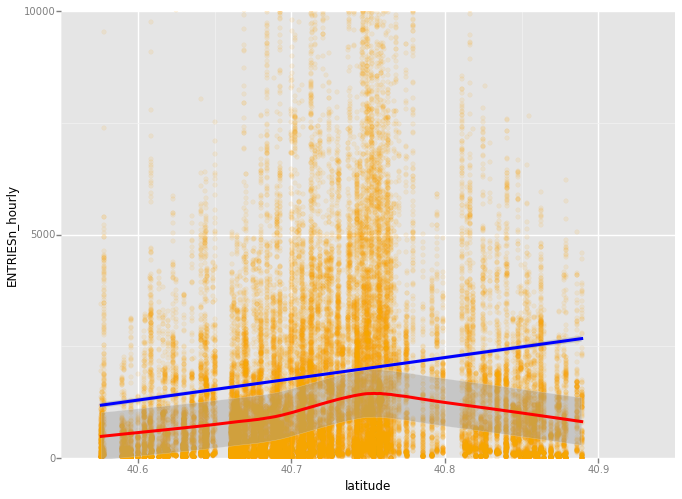

<ggplot: (284698321)>

In [137]:
ggplot(turnstile_weather, aes(x='latitude', y='ENTRIESn_hourly')) + \
    geom_point(alpha=0.1, color='orange') + \
    stat_smooth(size=3, color='red') + \
    stat_smooth(method='lm', color='blue', size=3) + \
    ylim(0, 10000)

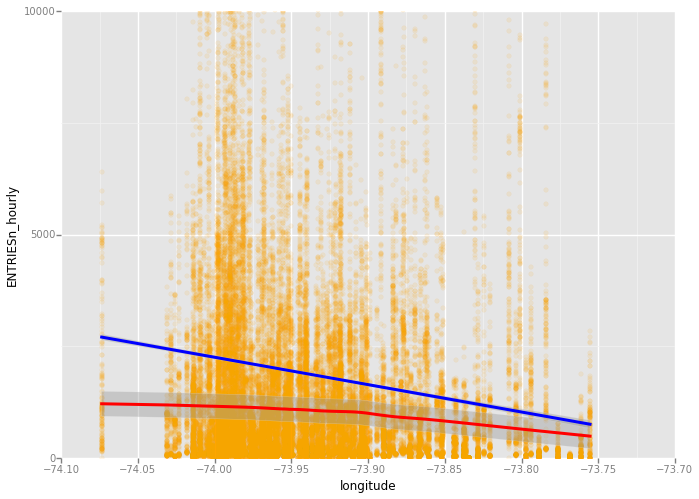

<ggplot: (284522413)>

In [138]:
ggplot(turnstile_weather, aes(x='longitude', y='ENTRIESn_hourly')) + \
    geom_point(alpha=0.1, color='orange') + \
    stat_smooth(size=3, color='red') + \
    stat_smooth(method='lm', color='blue', size=3) + \
    ylim(0, 10000)

## 4 Weather conditions

### 4.1 Weather conditions - General

ggplot(turnstile_weather, aes(x='ENTRIESn_hourly', color='conds')) + geom_density(fill=True, alpha=0.1) + xlim(0, 5000)

In [157]:
pd.unique(turnstile_weather.conds)

array(['Clear', 'Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Light Rain',
       'Scattered Clouds', 'Rain', 'Light Drizzle', 'Haze', 'Heavy Rain',
       'Fog', 'Mist'], dtype=object)

Maybe it could be useful to split the data into several different categories, like a previous classification prior to the regression analysis. For doing that, first we'd need to evaluate whether or not the distribution for different categories are different. Also we'd need to evaluate how many "groups" we'd create (for conds, day_week, etc).

## 5 Fog 

### 5.1 Fog - General

In [167]:
ggplot(turnstile_weather, aes(x='ENTRIESn_hourly', color='fog')) + geom_density() + xlim(0, 1000)
turn_fog = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.fog == 1]
turn_nofog = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.fog == 0]
u, p = st.mannwhitneyu(turn_fog, turn_nofog)
print 'Reject the null' if p < 0.01 else 'Fail to reject the null'
print 'Fog:{} No-Fog:{}'.format(turn_fog.mean(), turn_nofog.mean())

Reject the null
Fog:1631.98090692 No-Fog:1889.11614966


In [176]:
turnstile_weather.groupby('fog').describe()

DAYn      ENTRIESn  ENTRIESn_hourly        EXITSn  \
fog                                                                    
0   count  42230.000000  4.223000e+04     42230.000000  4.223000e+04   
    mean      16.010703  2.815785e+07      1889.116150  1.989156e+07   
    std        8.995097  3.044436e+07      2957.569299  2.029783e+07   
    min        1.000000  0.000000e+00         0.000000  0.000000e+00   
    25%        8.000000  1.042840e+07       275.000000  7.634165e+06   
    50%       16.000000  1.820627e+07       905.000000  1.332112e+07   
    75%       24.000000  3.266399e+07      2257.000000  2.396396e+07   
    max       31.000000  2.357746e+08     32814.000000  1.493782e+08   
1   count    419.000000  4.190000e+02       419.000000  4.190000e+02   
    mean      17.756563  2.479981e+07      1631.980907  1.768970e+07   
    std        2.640850  2.943436e+07      2361.528030  1.936890e+07   
    min       15.000000  2.404000e+03         0.000000  1.069000e+03   
    25%       15.000000  6.768909e+06       172.000000  5.695848e+06   
    50%       18.000000  1.572523e+07       793.000000  1.133594e+07   
    75%       18.000000  2.856316e+07      2081.500000  2.117822e+07   
    max       24.000000  1.824640e+08     15811.000000  1.240524e+08   

           EXITSn_hourly      day_week          hour      latitude  \
fog                                                                  
0   count   42230.000000  42230.000000  42230.000000  42230.000000   
    mean     1363.446223      2.902368     10.020175     40.724764   
    std      2187.183601      2.080165      6.953789      0.071681   
    min         0.000000      0.000000      0.000000     40.576152   
    25%       239.000000      1.000000      4.000000     40.677107   
    50%       666.000000      3.000000     12.000000     40.717241   
    75%      1538.000000      5.000000     16.000000     40.759123   
    max     34828.000000      6.000000     20.000000     40.889185   
1   count     419.000000    419.000000    419.000000    419.000000   
    mean     1164.109785      3.243437     12.725537     40.712901   
    std      1807.496240      1.955956      4.488005      0.067534   
    min         0.000000      1.000000      4.000000     40.576152   
    25%       117.000000      2.000000      8.000000     40.675382   
    50%       516.000000      2.000000     16.000000     40.707564   
    75%      1356.000000      6.000000     16.000000     40.752247   
    max     12725.000000      6.000000     20.000000     40.889185   

              longitude   meanprecipi      ...          meantempi  \
fog                                        ...                      
0   count  42230.000000  42230.000000      ...       42230.000000   
    mean     -73.940468      0.004468      ...          63.125236   
    std        0.059565      0.016313      ...           6.959926   
    min      -74.073622      0.000000      ...          49.400000   
    25%      -73.987342      0.000000      ...          58.283333   
    50%      -73.953459      0.000000      ...          60.950000   
    75%      -73.907733      0.000000      ...          68.080000   
    max      -73.755383      0.157500      ...          79.800000   
1   count    419.000000    419.000000      ...         419.000000   
    mean     -73.929924      0.019690      ...          60.941213   
    std        0.072403      0.011818      ...           3.763367   
    min      -74.073622      0.000000      ...          56.780000   
    25%      -73.987620      0.016667      ...          58.716667   
    50%      -73.953545      0.021667      ...          59.020000   
    75%      -73.873561      0.030000      ...          61.516667   
    max      -73.755383      0.045000      ...          71.760000   

              meanwspdi       precipi     pressurei          rain  \
fog                                                                 
0   count  42230.000000  42230.000000  42230.000000  42230.000000   
    mean   

I wouldn't say that it has a siginifficant influence. The data says that the number of entries when there is fog is signifficantly less than when it isn't, but maybe this factor wasn't determinant in the number of entries.

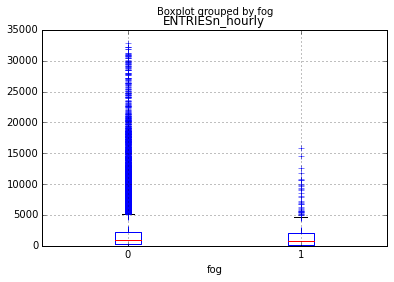

In [184]:
turnstile_weather.boxplot(column='ENTRIESn_hourly', by='fog')

## 6 precipi

### 6.1 precipi - General

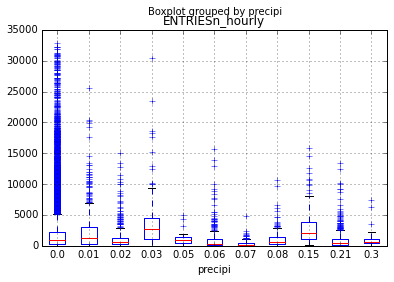

In [192]:
ggplot(turnstile_weather, aes(x='precipi', y='ENTRIESn_hourly')) + geom_point()
turnstile_weather.boxplot(column='ENTRIESn_hourly', by='precipi')

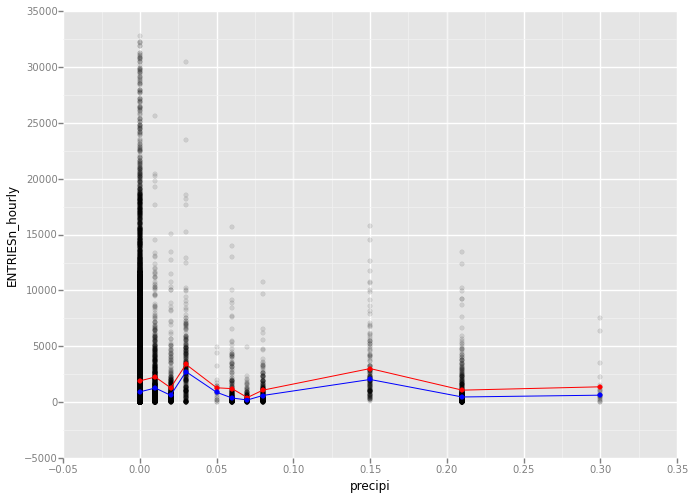

<ggplot: (289256661)>

In [205]:
turn_prec_mean = turnstile_weather.groupby('precipi', as_index=False).mean()
turn_prec_median = turnstile_weather.groupby('precipi', as_index=False).median()
ggplot(turnstile_weather, aes(x='precipi', y='ENTRIESn_hourly')) + geom_point(alpha=0.1) +\
    geom_point(turn_prec_mean, aes(x='precipi', y='ENTRIESn_hourly'), color='red') +\
    geom_line(turn_prec_mean, aes(x='precipi', y='ENTRIESn_hourly'), color='red') +\
    geom_point(turn_prec_median, aes(x='precipi', y='ENTRIESn_hourly'), color='blue') +\
    geom_line(turn_prec_median, aes(x='precipi', y='ENTRIESn_hourly'), color='blue')

## 7 pressurei

### 7.1 pressurei - General

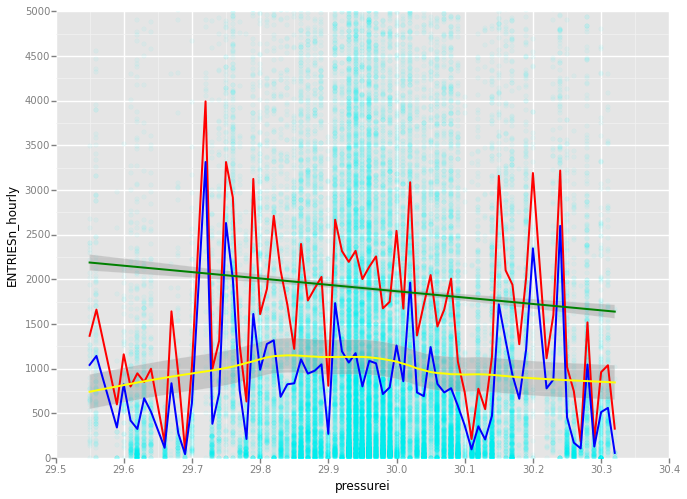

<ggplot: (285442141)>

In [250]:
column = 'pressurei'
turn_prec_mean = turnstile_weather.groupby(column, as_index=False).mean()
turn_prec_median = turnstile_weather.groupby(column, as_index=False).median()
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + geom_point(alpha=0.05, color='cyan') +\
    geom_line(turn_prec_mean, aes(x=column, y='ENTRIESn_hourly'), color='red', size=2) +\
    geom_line(turn_prec_median, aes(x=column, y='ENTRIESn_hourly'), color='blue', size=2) +\
    stat_smooth(color='yellow', size=2) +\
    stat_smooth(color='green', size=2, method='lm') +\
    ylim(0, 5000)

**NOTE**: 
- Red: mean   
- Blue: median   
- Yellow: LOESS   
- Green: LS

I wouldn't say that there a correlation between the two variables.

In [254]:
# Remove ENTRIESn_hourly outliers. The argument should be turnstile_weather (or with the same structure)
def remove_outliers(df):
    q1 = df.ENTRIESn_hourly.quantile(0.25)
    q3 = df.ENTRIESn_hourly.quantile(0.75)
    iqr = q3-q1
    new_df = df[np.abs(df.ENTRIESn_hourly - df.ENTRIESn_hourly.mean()) <= iqr]
    return new_df
tw_no_outliers = remove_outliers(turnstile_weather)

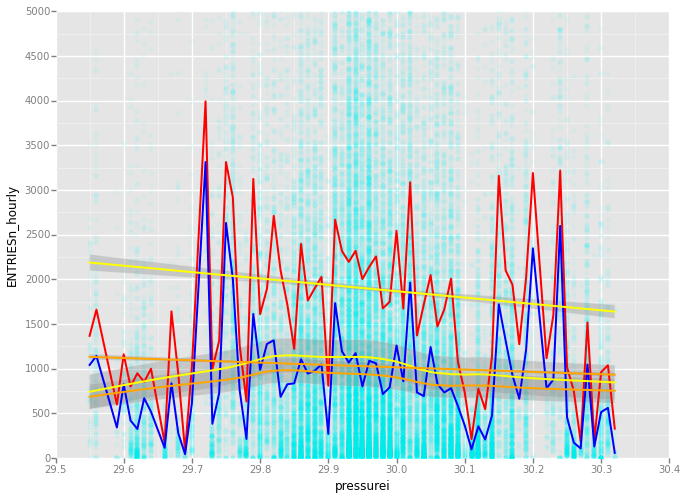

<ggplot: (429508629)>

In [257]:
column = 'pressurei'
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + geom_point(alpha=0.05, color='cyan') +\
    geom_line(turn_prec_mean, aes(x=column, y='ENTRIESn_hourly'), color='red', size=2) +\
    geom_line(turn_prec_median, aes(x=column, y='ENTRIESn_hourly'), color='blue', size=2) +\
    stat_smooth(color='yellow', size=2) +\
    stat_smooth(color='yellow', size=2, method='lm') +\
    ylim(0, 5000) +\
    stat_smooth(tw_no_outliers, color='orange', size=2) +\
    stat_smooth(tw_no_outliers, color='orange', size=2, method='lm')

Here we can see the regression line with all the data in **yellow** and the regression line without the outliers in **orange**. The figure shows that the outliers have a big influence in the regression line, should we avoid them for this analysis? We can try both systems and see who has a better performance.

## 8 tempi

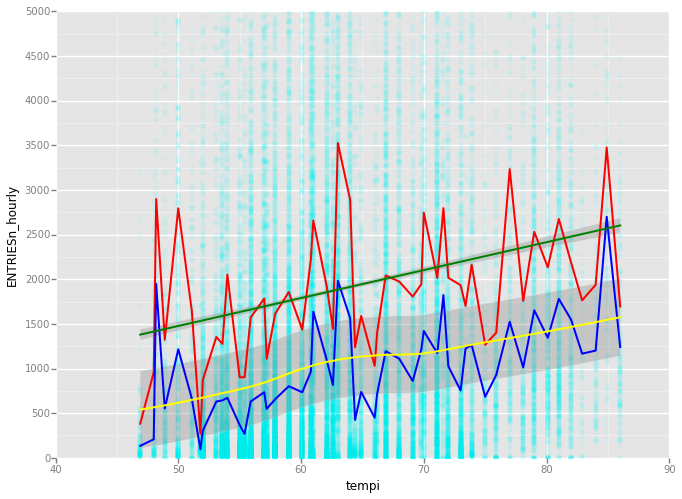

<ggplot: (410223369)>

In [259]:
column = 'tempi'
turn_prec_mean = turnstile_weather.groupby(column, as_index=False).mean()
turn_prec_median = turnstile_weather.groupby(column, as_index=False).median()
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + geom_point(alpha=0.05, color='cyan') +\
    geom_line(turn_prec_mean, aes(x=column, y='ENTRIESn_hourly'), color='red', size=2) +\
    geom_line(turn_prec_median, aes(x=column, y='ENTRIESn_hourly'), color='blue', size=2) +\
    stat_smooth(color='yellow', size=2) +\
    stat_smooth(color='green', size=2, method='lm') +\
    ylim(0, 5000)

## 9 wspdi

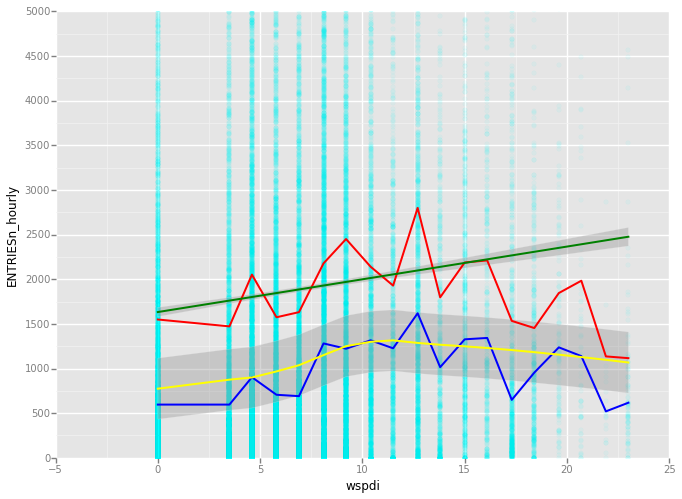

<ggplot: (421510101)>

In [260]:
column = 'wspdi'
turn_prec_mean = turnstile_weather.groupby(column, as_index=False).mean()
turn_prec_median = turnstile_weather.groupby(column, as_index=False).median()
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + geom_point(alpha=0.05, color='cyan') +\
    geom_line(turn_prec_mean, aes(x=column, y='ENTRIESn_hourly'), color='red', size=2) +\
    geom_line(turn_prec_median, aes(x=column, y='ENTRIESn_hourly'), color='blue', size=2) +\
    stat_smooth(color='yellow', size=2) +\
    stat_smooth(color='green', size=2, method='lm') +\
    ylim(0, 5000)

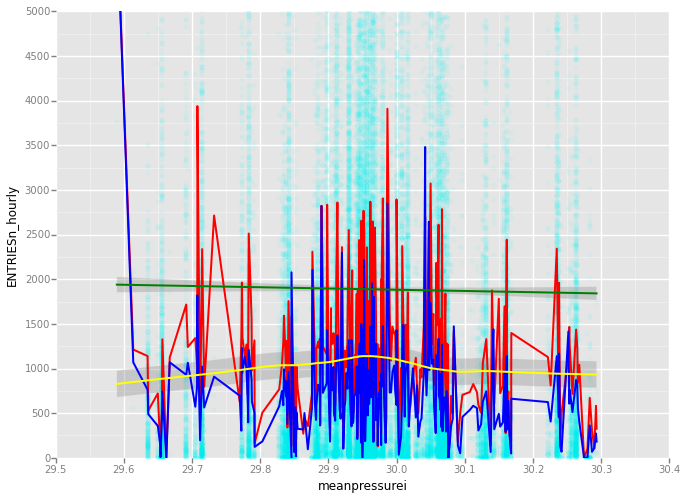

<ggplot: (439173005)>

In [262]:
column = 'meanpressurei'
turn_prec_mean = turnstile_weather.groupby(column, as_index=False).mean()
turn_prec_median = turnstile_weather.groupby(column, as_index=False).median()
ggplot(turnstile_weather, aes(x=column, y='ENTRIESn_hourly')) + geom_point(alpha=0.05, color='cyan') +\
    geom_line(turn_prec_mean, aes(x=column, y='ENTRIESn_hourly'), color='red', size=2) +\
    geom_line(turn_prec_median, aes(x=column, y='ENTRIESn_hourly'), color='blue', size=2) +\
    stat_smooth(color='yellow', size=2) +\
    stat_smooth(color='green', size=2, method='lm') +\
    ylim(0, 5000)